<a href="https://colab.research.google.com/github/pascale25/DeeP_learning_portfolio/blob/master/Feedforward_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# classification MNIST Dataset


In [ ]:
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt



image = 28 *28 = 784 pixels (grayscale) - one color channel

0 to 255 ----- have to scale 0 to 1 

data shape is (N x D) not (N X 28 x 28) ----- inputs.view(-1, 784)

In [ ]:
train_dataset = torchvision.datasets.MNIST(root =".",
                                           train = True,
                                           transform = transforms.ToTensor(),
                                           download = True)
X_train = train_dataset.data 
y_train = train_dataset.targets

#_train.shape = N *28*28
#y_train.shape = N
#N = 60000

In [ ]:
X_train # three dimentional array

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [ ]:
X_train.max() , X_train.shape

(tensor(255, dtype=torch.uint8), torch.Size([60000, 28, 28]))

In [ ]:
y_train , y_train.shape # one dimentional array

(tensor([5, 0, 4,  ..., 5, 6, 8]), torch.Size([60000]))

In [ ]:
test_dataset = torchvision.datasets.MNIST(root =".",
                                          train = False,
                                          transform = transforms.ToTensor(),
                                          download = True)
X_test = test_dataset
y_test = test_dataset.targets

#X_test.shape = Ntest *28*28
#y_test.shape = Ntest
#Ntest = 10000

In [ ]:
model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128,10)
)
# no need for final softmax

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
model.to(device)

cuda:0


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
# loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
from torch.utils.data import dataset
# Data laoder 
batch_size = 128
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset= test_dataset,
                                               batch_size = batch_size,
                                               shuffle =False)

In [ ]:
# train the model
epochs = 10

train_losses = np.zeros(epochs)
test_losses = np.zeros(epochs)
#train_losss = []

for it in range(epochs):
  train_losss = []

  for inputs, targets in train_loader:
    # move to GPU
    inputs, targets = inputs.to(device), targets.to(device)
    # reshape the input
    inputs = inputs.view(-1, 784)
    
    # zero the parameter gradients
    optimizer.zero_grad()
    # forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    # backward and optimize
    loss.backward()
    optimizer.step()

    train_losss.append(loss.item())

    # gest train and test loss
    train_losss = np.mean(train_losss) # a liitle m
  else:
    with torch.no_grad():
      test_loss =[]
      for inputs, targets in test_loader:
      inputs, targets = inputs.to(device), targets.to(device)
      inputs = inputs.view(-1, 784)
      outputs = model(inputs)
      loss = criterion(outputs, targets)
      test_loss.append(loss.item())
      test_loss = np.mean(test_loss)

  # save losses
  train_losses [it] = train_losss
  test_losses[it] = test_loss
  print(f"Epoch{it+1}/{epochs}, train loss: {train_losss:.4f}, test loss {test_loss:.4f}")

AttributeError: ignored

In [ ]:
#plot the train loss and test loss per iteration
plt.plot(train_losses, label ='train loss')
plt.plot(test_losses, label ='test loss')
plt.legend()
plt.show()

In [ ]:
###

# MNIST Classification Model 2


In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from torch import nn
from torchvision import datasets, transforms

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [4]:
transform = transforms.Compose([transforms.Resize((28,28)),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,))
                               ])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = 100, shuffle=False)

In [5]:
def im_convert(tensor):
  image = tensor.cpu().clone().detach().numpy()
  image = image.transpose(1, 2, 0)
  image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
  image = image.clip(0, 1)
  return image

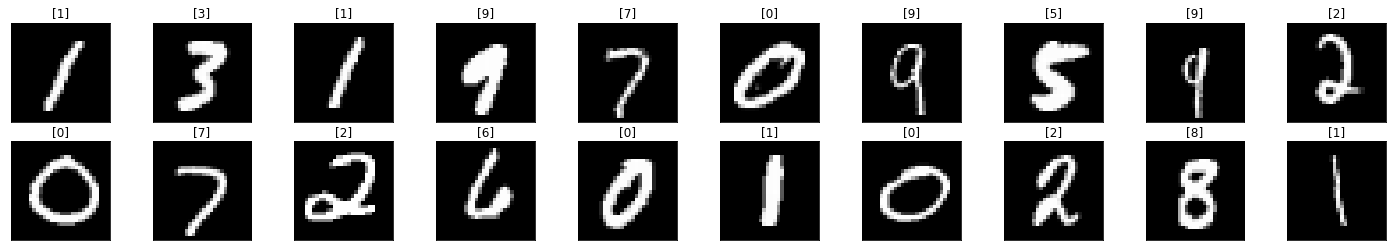

In [7]:
train_it = iter(train_loader)
images, labels = train_it.next()
fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title([labels[idx].item()])

In [ ]:
class MNISTNET(nn.Module):
    def __init__(self):
      super().__init__()
      self.conv1 = nn.Conv2d(1, 20, 5, 1)
      self.conv2 = nn.Conv2d(20, 50, 5, 1)
      self.fc1 = nn.Linear(4*4*50, 500)
      self.dropout1 = nn.Dropout(0.5)
      self.fc2 = nn.Linear(500, 10)
    def forward(self, x):
      x = F.relu(self.conv1(x))
      x = F.max_pool2d(x, 2, 2)
      x = F.relu(self.conv2(x))
      x = F.max_pool2d(x, 2, 2)
      x = x.view(-1, 4*4*50)
      x = F.relu(self.fc1(x))
      x = self.dropout1(x)
      x = self.fc2(x)
      return x

In [ ]:
torch.manual_seed(42)
model = MNISTNET().to(device)
model

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

In [ ]:
# train the model
epochs = 10

train_losses = np.zeros(epochs)
test_losses = np.zeros(epochs)
#train_losss = []

for it in range(epochs):
  train_loss = 0.0
  correct_label = 0.0

  for inputs, targets in train_loader:
    # move to GPU
    inputs, targets = inputs.to(device), targets.to(device)
    # reshape the input
    #inputs = inputs.view(-1, 784)
    # forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    # zero the parameter gradients
    optimizer.zero_grad()
    # backward and optimize
    loss.backward()
    optimizer.step()

    _, preds = torch.max(outputs, 1)
    train_loss += loss.item()
    correct_label += torch.sum(preds == labels.data)

    # gest train and test loss
    #train_losss = np.mean(train_losss) # a liitle m

  test_loss = 0.0
  corrects_test = 0.0
  for inputs, targets in test_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    #inputs = inputs.view(-1, 784)
    val_outputs = model(inputs)
    losss = criterion(val_outputs, targets)
    _, val_preds = torch.max(val_outputs, 1)
    test_loss += losss.item()
        corrects_test += torch.sum(val_preds == val_labels.data)
      

    test_loss.append(loss.item())
  test_loss = np.mean(test_loss)

  # save losses
  train_losses [it] = train_losss
  test_losses[it] = test_loss
  print(f"Epoch{it+1}/{epochs}, train loss: {train_losss:.4f}, test loss {test_loss:.4f}")

In [ ]:
#### https://github.com/rslim087a/PyTorch-for-Deep-Learning-and-Computer-Vision-Course-All-Codes-/blob/master/PyTorch%20for%20Deep%20Learning%20and%20Computer%20Vision%20Course%20(All%20Codes)/Convolutional%20Neural%20Networks.ipynb

In [ ]:
epochs = 15
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []

for e in range(epochs):
  
  running_loss = 0.0
  running_corrects = 0.0
  val_running_loss = 0.0
  val_running_corrects = 0.0
  
  for inputs, labels in training_loader:
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    _, preds = torch.max(outputs, 1)
    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)

  else:
    with torch.no_grad():
      for val_inputs, val_labels in validation_loader:
        val_inputs = val_inputs.to(device)
        val_labels = val_labels.to(device)
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs, val_labels)
        
        _, val_preds = torch.max(val_outputs, 1)
        val_running_loss += val_loss.item()
        val_running_corrects += torch.sum(val_preds == val_labels.data)
      
    epoch_loss = running_loss/len(training_loader)
    epoch_acc = running_corrects.float()/ len(training_loader)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc)
    
    val_epoch_loss = val_running_loss/len(validation_loader)
    val_epoch_acc = val_running_corrects.float()/ len(validation_loader)
    val_running_loss_history.append(val_epoch_loss)
    val_running_corrects_history.append(val_epoch_acc)
    print('epoch :', (e+1))
    print('training loss: {:.4f}, acc {:.4f} '.format(epoch_loss, epoch_acc.item()))
    print('validation loss: {:.4f}, validation acc {:.4f} '.format(val_epoch_loss, val_epoch_acc.item()))

In [ ]:
plt.plot(running_loss_history, label='training loss')
plt.plot(val_running_loss_history, label='validation loss')
plt.legend()

In [ ]:
plt.plot(running_corrects_history, label='training accuracy')
plt.plot(val_running_corrects_history, label='validation accuracy')
plt.legend()

In [ ]:
dataiter = iter(validation_loader)
images, labels = dataiter.next()
images = images.to(device)
labels = labels.to(device)
output = model(images)
_, preds = torch.max(output, 1)

fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())), color=("green" if preds[idx]==labels[idx] else "red"))